# Project To Predict Churn using Decision Tree Maching Learning Models

In [1]:
# Import necesssary lib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc=('figure.figsize':(8,6)))

import datetime
import warnings
import itertools
import graphviz
import pydotplus

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
# Load Data
data = pd.read_csv('churn raw data.txt')

### Perfroming Exploratory Data Analysis

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# check size of data
data.shape

(10000, 14)

In [5]:
# Checking for number of unique values in each columns 

for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of unique values in column {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of unique values in column {} :{}'.format(column, nr_values))

The number of unique values in column RowNumber :10000
The number of unique values in column CustomerId :10000
The number of unique values in column Surname :2932
The number of unique values in column CreditScore :460
The number of unique values in column Geography :3 -- ['France' 'Germany' 'Spain']
The number of unique values in column Gender :2 -- ['Female' 'Male']
The number of unique values in column Age :70
The number of unique values in column Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of unique values in column Balance :6382
The number of unique values in column NumOfProducts :4 -- [1 2 3 4]
The number of unique values in column HasCrCard :2 -- [0 1]
The number of unique values in column IsActiveMember :2 -- [0 1]
The number of unique values in column EstimatedSalary :9999
The number of unique values in column Exited :2 -- [0 1]


In [6]:
# Checking for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Checking correlation among features
correlation = data.corr()
correlation

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


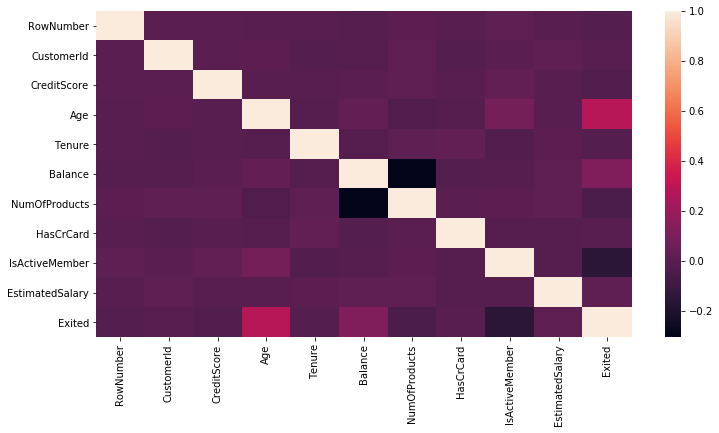

In [8]:
# Visualizing using heatmap
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(correlation)


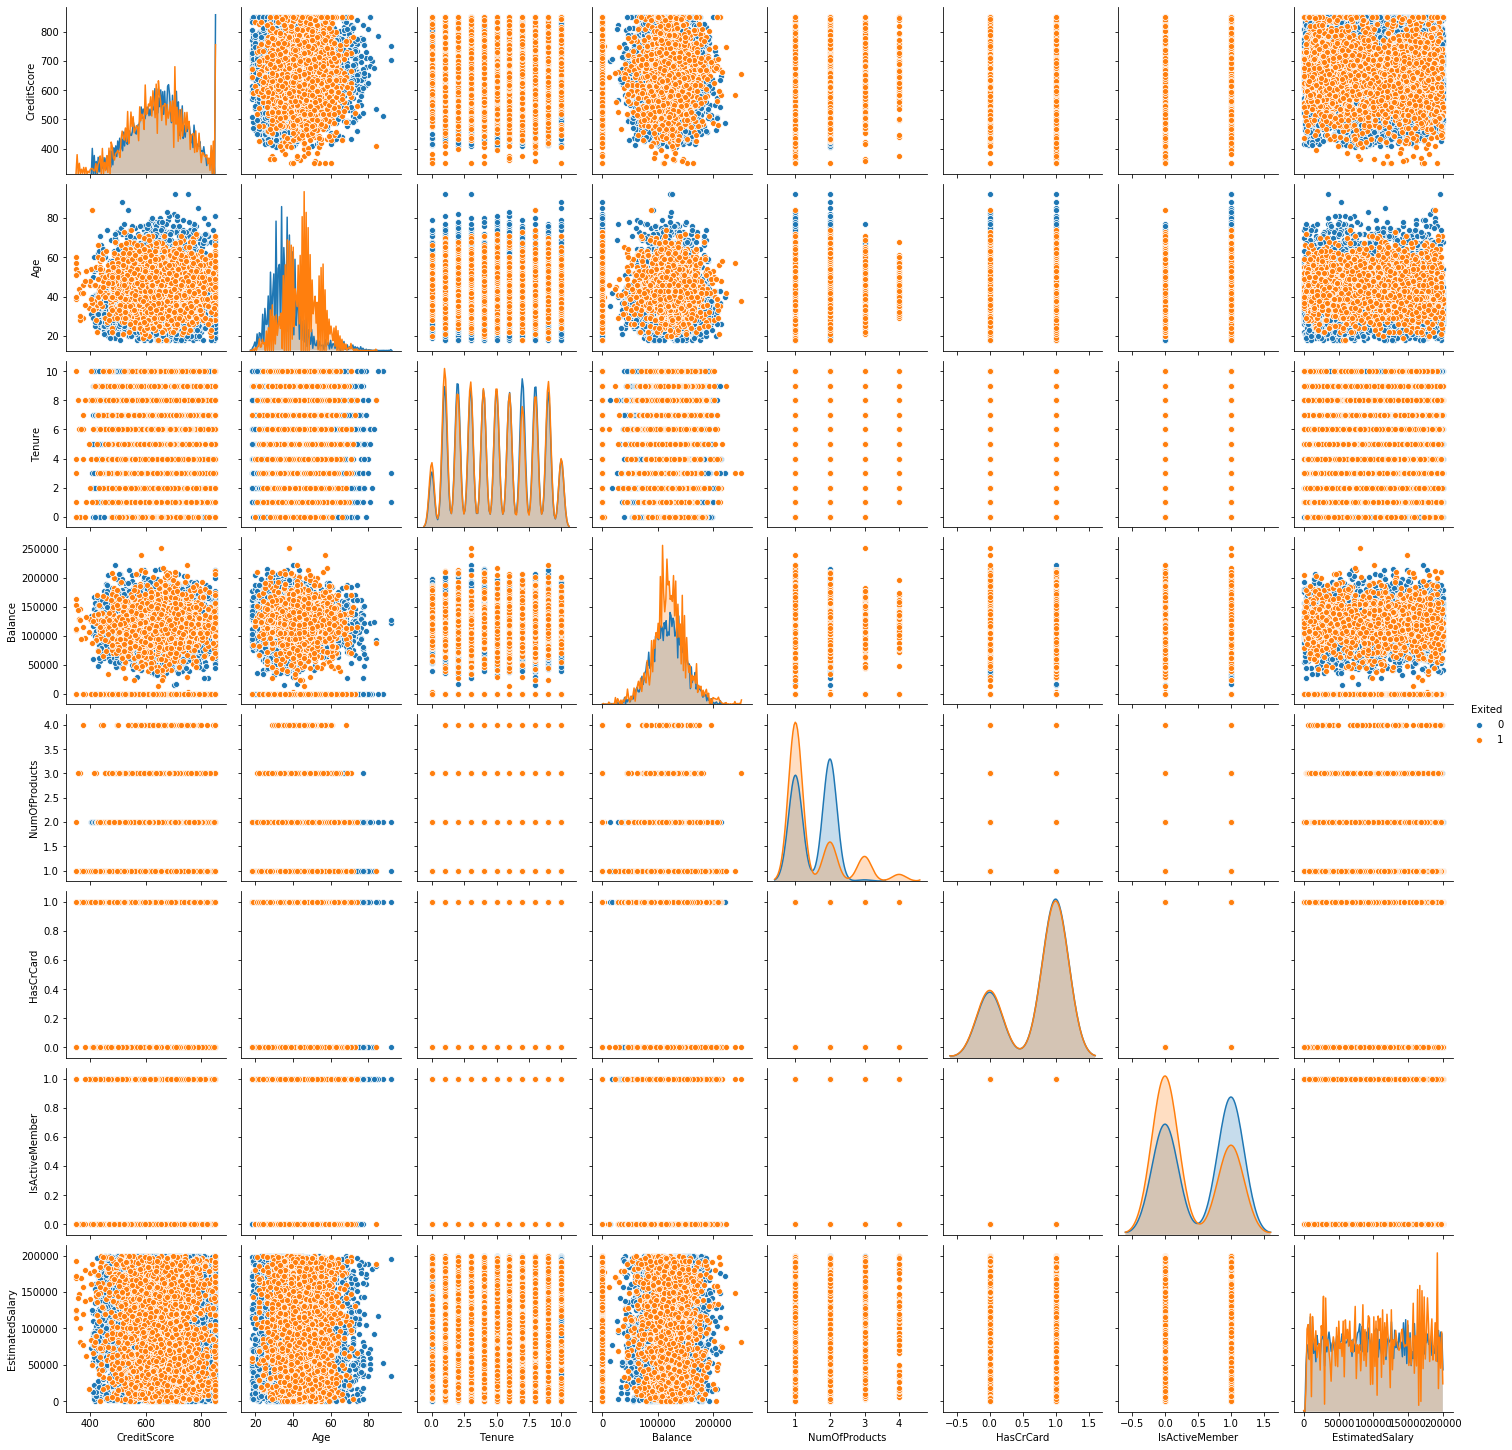

In [9]:
# checking for corr
data_2 = data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# Visualize the data using seaborn Pairplots
pairplot = sns.pairplot(data_2, hue = 'Exited', diag_kws={'bw': 0.2})

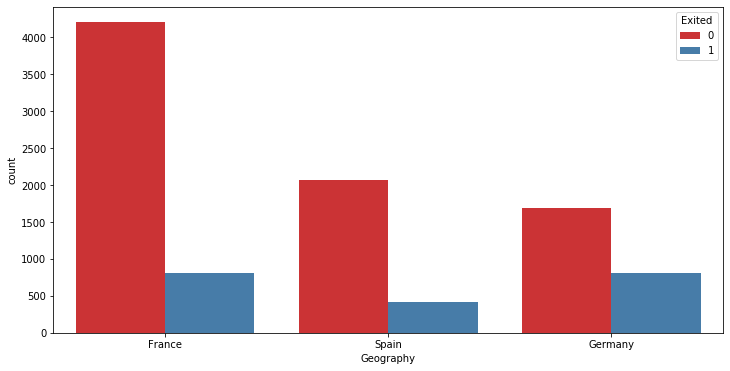

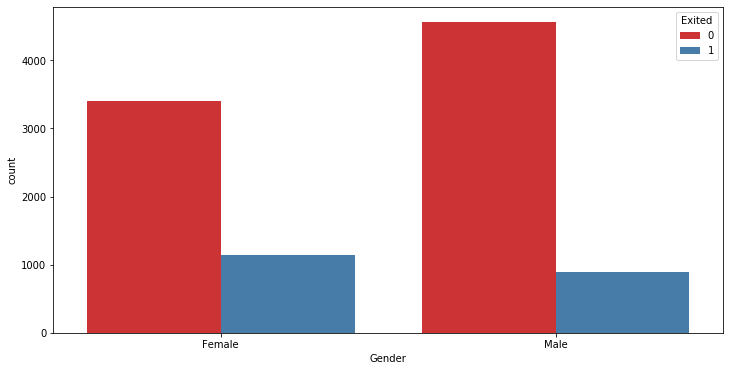

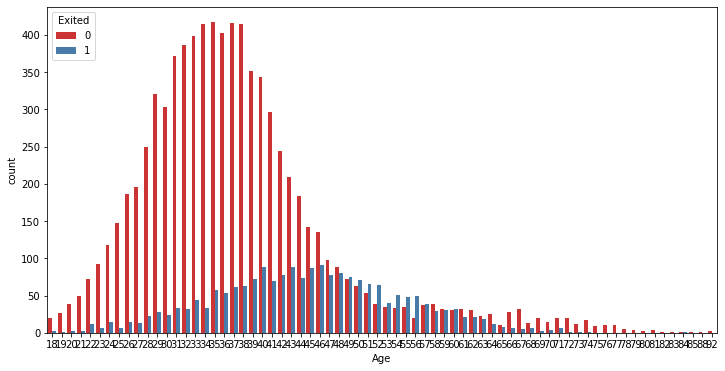

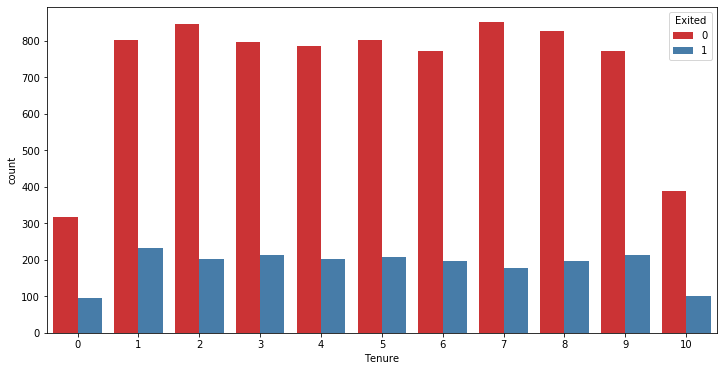

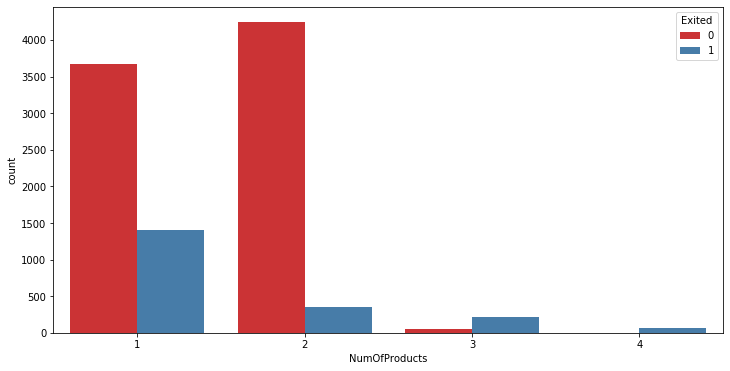

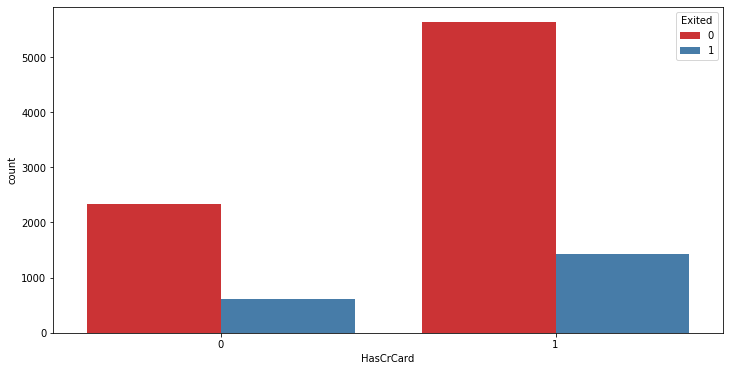

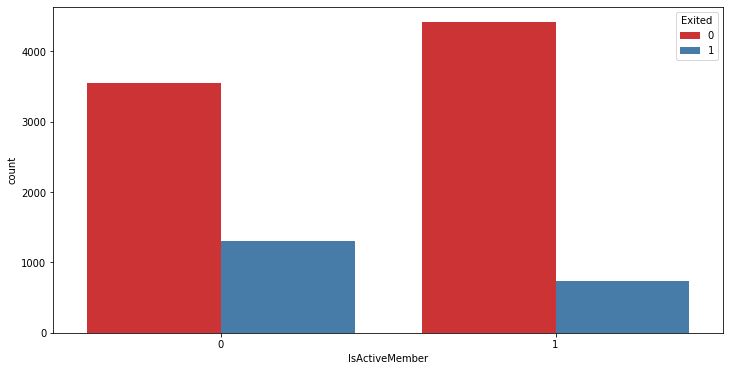

In [10]:
features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=data_2, hue = 'Exited', palette="Set1")

In [11]:
# Group by Churn and Geography
G1= data.groupby(['Exited','Geography']).size().reset_index().rename(columns={0:'number_of_churn'})
G1

,Exited,Geography,number_of_churn
0,0,France,4204
1,0,Germany,1695
2,0,Spain,2064
3,1,France,810
4,1,Germany,814
5,1,Spain,413


### MODEL PREPROCESSING

In [12]:
# Making categorical variables into numeric representation - creating dummies for categorial variables

dummy_data = pd.get_dummies(data_2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
dummy_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [13]:
# Scaling our features
scaled_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
dummy_data[scaled_vars] = scaler.fit_transform(dummy_data[scaled_vars])
dummy_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


### Splitting Data

In [14]:
# Input features
X = dummy_data.drop('Exited', axis=1).values 
# Target variable
y = dummy_data['Exited'].values 

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

#using the Hold Out Validation technique
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


## DECISION TREE MODEL

In [25]:
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
d_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [26]:
import graphviz
import pydotplus

dot_data = tree.export_graphviz(d_tree, out_file=None, 
    feature_names=dummy_data.drop('Exited', axis=1).columns,    
    class_names=dummy_data['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [27]:
# Calculating Feature Importance
for i, column in enumerate(dummy_data.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, d_tree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [d_tree.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.466
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.032
Importance of feature NumOfProducts:, 0.351
Importance of feature EstimatedSalary:, 0.010
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.029
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.111
Importance of feature IsActiveMember_1:, 0.000


,level_0,index,Variable,Feature Importance Score
0,16,NaN,Age,0.466343
1,0,1.0,Age,0.427647
2,1,4.0,NumOfProducts,0.353417
3,19,NaN,NumOfProducts,0.351325
4,28,NaN,IsActiveMember_0,0.110890
5,2,13.0,IsActiveMember_0,0.094137
6,3,3.0,Balance,0.069292
7,4,7.0,Geography_Germany,0.034500
8,18,NaN,Balance,0.031744
9,22,NaN,Geography_Germany,0.029364


In [28]:
# Accuracy on Train
print("Training Accuracy is: ", d_tree.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", d_tree.score(X_test, y_test))

Training Accuracy is:  0.8494444444444444
Testing Accuracy is:  0.851


### The above code is used to visualize a decision tree model, calculate feature importance, and print the accuracy of the model on the training and testing data.

In [29]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

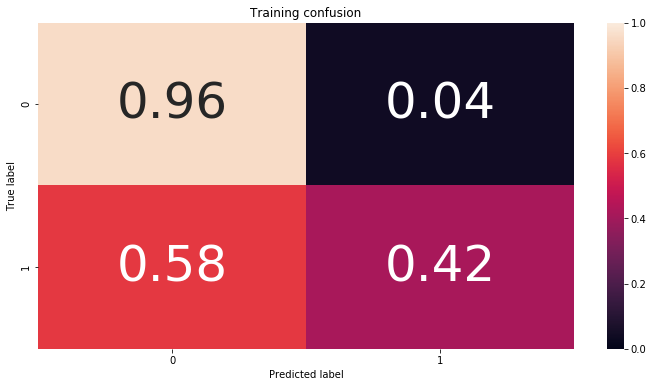

In [30]:
y_pred = d_tree.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=d_tree.classes_, title='Training confusion')

In [31]:
y_pred = d_tree.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[6880,  289],
       [1066,  765]], dtype=int64)

## RANDOM FOREST MODEL

Training Accuracy is:  1.0
Testing Accuracy is:  0.866


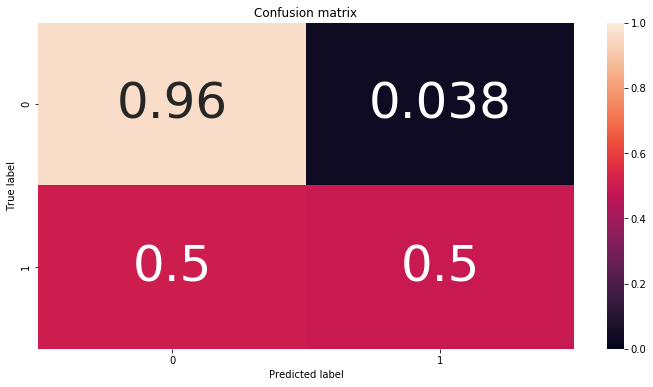

In [33]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.861
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.795
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.801
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.866
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.799
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.810
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.835
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.853
Classification accuracy on test set with max features = log2 and max_depth = None: 0.866
Classification accuracy on test set with max features = log2

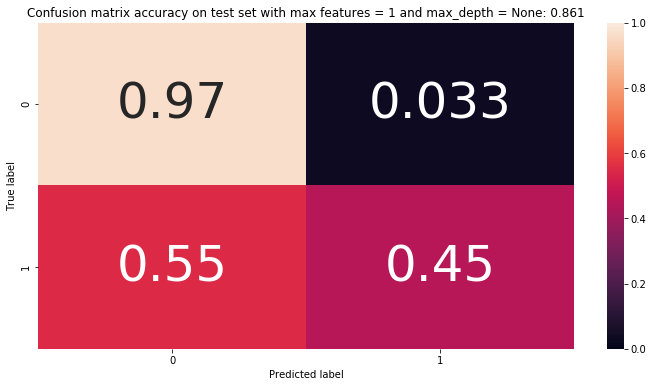

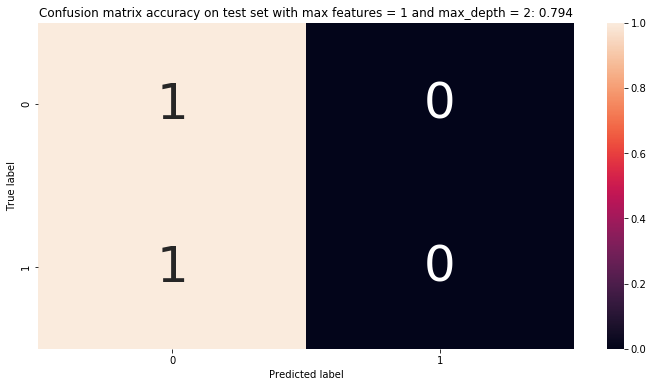

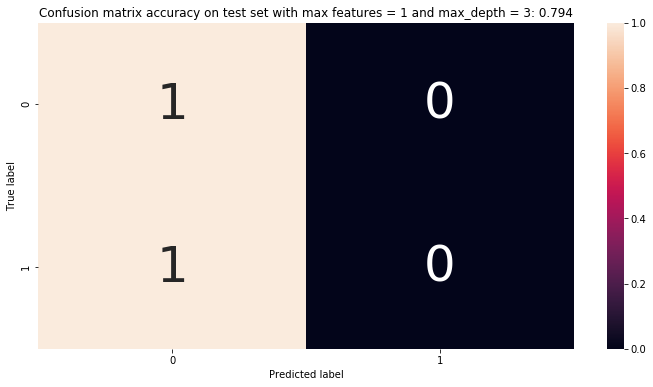

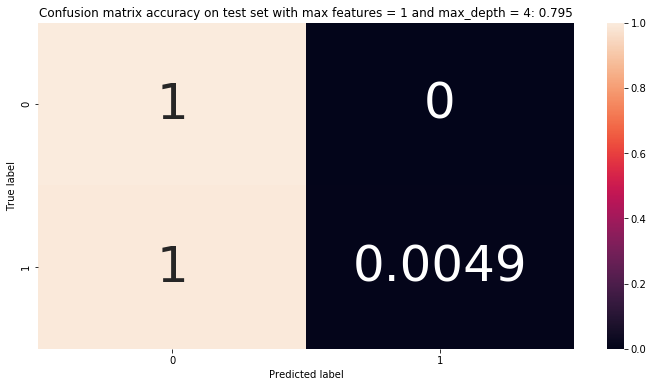

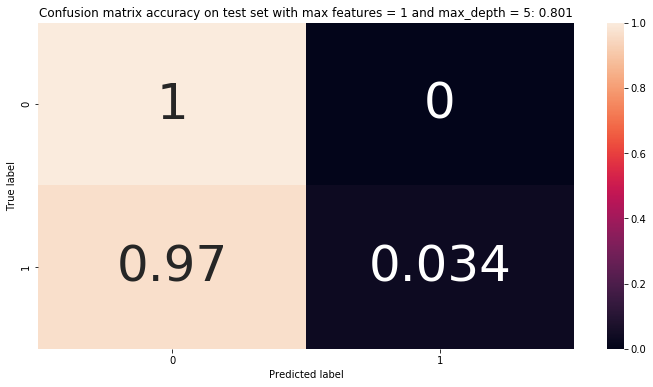

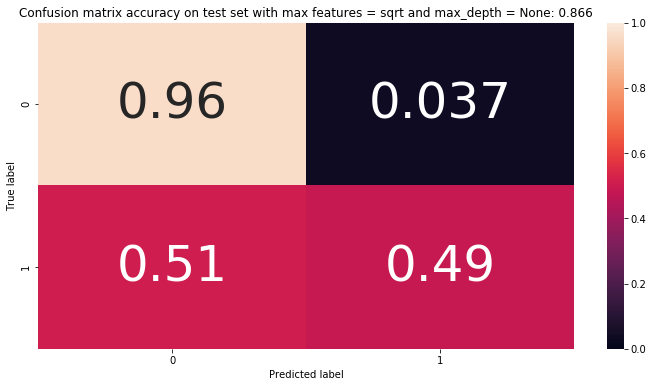

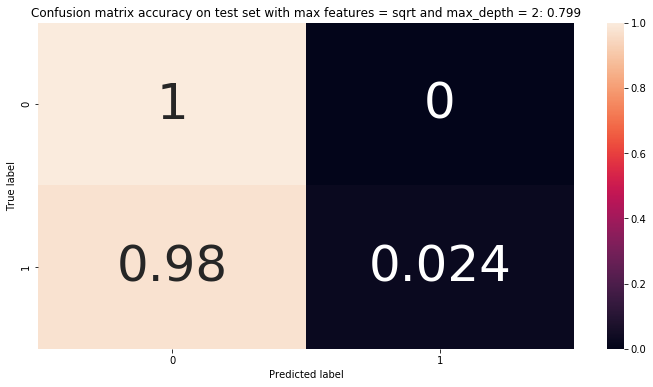

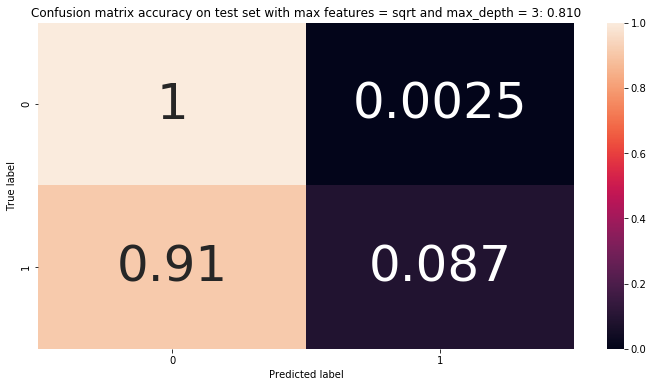

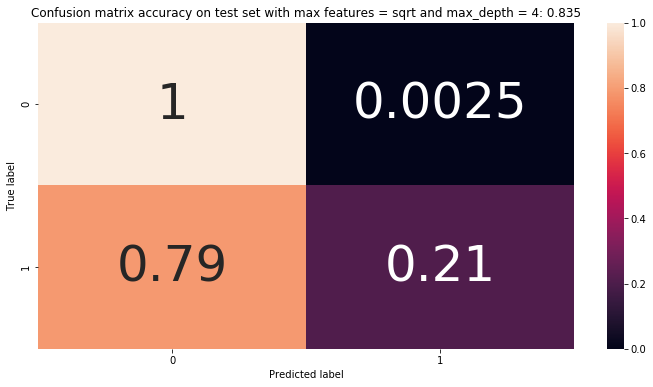

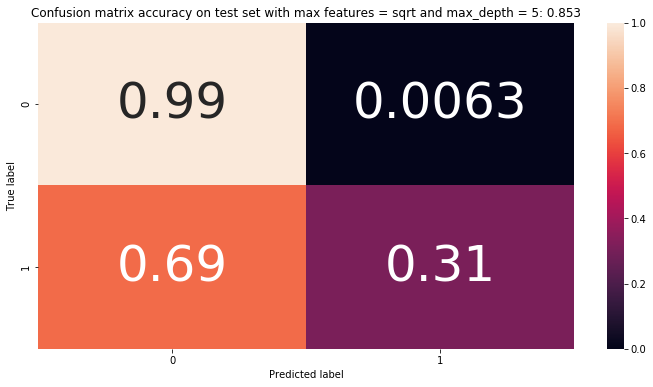

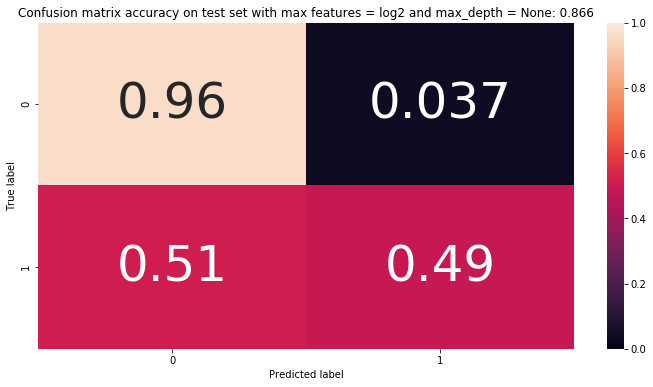

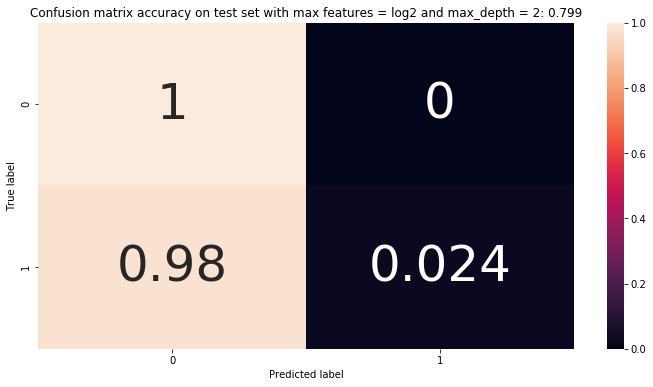

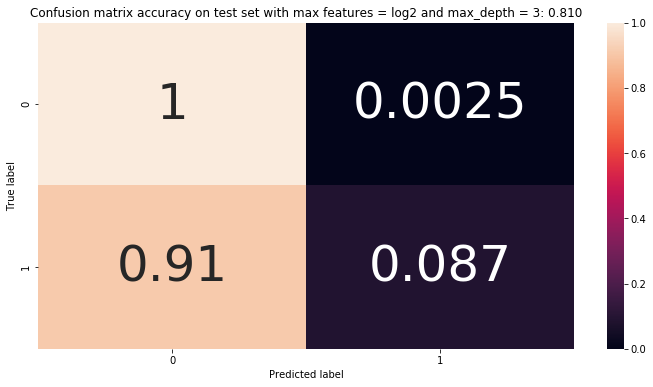

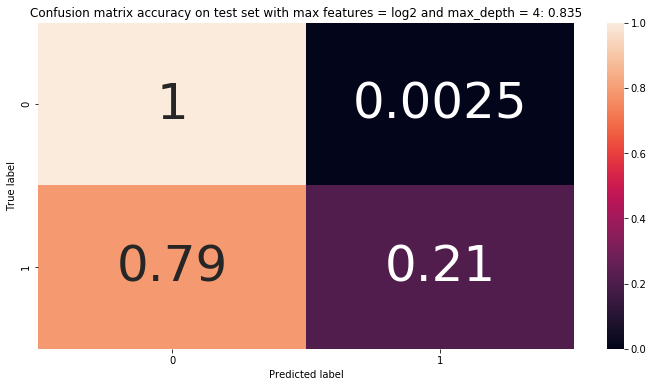

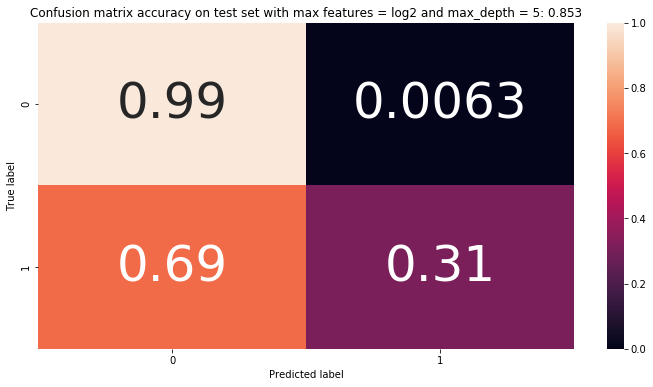

In [35]:
# Tunning Random Forest

from itertools import product
n_estimators = 200
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

Best I could get from tunning was a parcentage of 49%

Now to try XG BOOSTING

## XG BOOST [EXTREME GRADIENT BOOSTING]

In [39]:
!pip install xgboost

In [41]:
!pip install xgboost --install-option="--gpu"

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\pip\_internal\commands\install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist', n_jobs=2)

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[CV]  min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=nan, total=   0.0s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[CV]  min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, score=nan, total=   0.0s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:13:29] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=nan, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=nan, total=   0.0s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, score=nan, total=   0.0s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4 
[09:13:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [09:13:30] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


XGBoostError: [09:13:30] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

#### ERROR DUE TO GPU, But coding goes on

In [44]:
clf.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [45]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0.1,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=2,
              num_parallel_tree=None, objective='binary:logistic',
              predictor=None, random_state=None, reg_alpha=None, ...)

In [49]:
#The code above shows the final model obtained after performing hyperparameter tuning using RandomizedSearchCV. 
#The best parameters were obtained using clf.best_params_ and the model with the best parameters was obtained using clf.best_estimator_. 
#The final model is an XGBClassifier with the following hyperparameters:

final_model = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0.1,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=7,
              monotone_constraints=None, n_estimators=100, n_jobs=2,
              num_parallel_tree=None, objective='binary:logistic',
              predictor=None, random_state=None, reg_alpha=None)

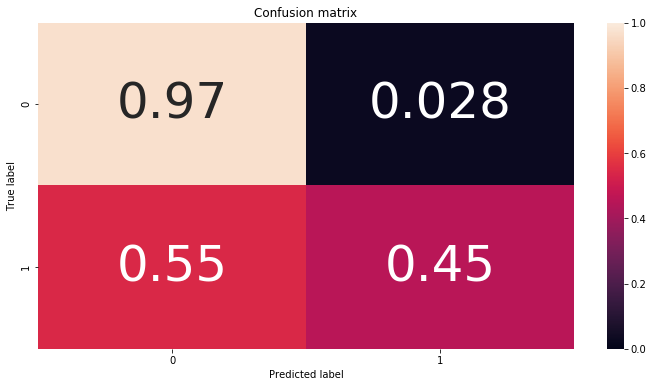

In [50]:
# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## Seems the initial Random Forest model without tunning seems to be the best fit for this model, so I'll be going with that

### Now to test our model on new data

In [72]:
new_data = pd.read_csv("new unseen data.txt")
new_data = new_data.drop(['Exited'],axis=1)

In [73]:
new_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [74]:
# Applying the same pre-processing stages

# Limiting the data
new_data_2 = new_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [75]:
# dummy variables
new_data_2 = pd.get_dummies(new_data_2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])


In [76]:
#scaling
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
new_data_2[scale_vars] = scaler.fit_transform(new_data_2[scale_vars])


new_data_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.507077,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,0,1,1,0,0,1,0,1


In [77]:
pred_value = rf.predict(new_data_2.values)

In [78]:
pred_value

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
pred_value_prob = rf.predict_proba(new_data_2.values)
pred_value_prob

array([[0.77244484, 0.22755516],
       [0.78985983, 0.21014017],
       [0.25929917, 0.74070083],
       ...,
       [0.88138406, 0.11861594],
       [0.74130735, 0.25869265],
       [0.85825678, 0.14174322]])

In [80]:
# function to select second column for probabilities

def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_value_prob, 1)

[0.22755515591482156,
 0.21014017356956582,
 0.7407008326555181,
 0.13676743089060175,
 0.23911287440017484,
 0.3317075821123179,
 0.1395855310717429,
 0.6954249241563006,
 0.17841759777868402,
 0.07828247403485068,
 0.10109118858292904,
 0.0916596403674374,
 0.12400525369918956,
 0.12186190510750297,
 0.0805326707395148,
 0.26557592978626077,
 0.614856828048513,
 0.0719778170271619,
 0.41598929407184615,
 0.06764368646738661,
 0.1052821200681733,
 0.1308185124609804,
 0.22728222395696776,
 0.14881383747305382,
 0.1305802735423009,
 0.05706483661892185,
 0.16437770944003216,
 0.25067977590041113,
 0.3690907119289972,
 0.06286105226030675,
 0.4761097173230091,
 0.09183522317254265,
 0.2676415826871048,
 0.15712855079609478,
 0.07364580302212945,
 0.456113691663468,
 0.08909446422191479,
 0.08349599558092693,
 0.08947798767627844,
 0.1720809737240899,
 0.17181421218975726,
 0.531762891434047,
 0.2458950152321214,
 0.5155882250917911,
 0.24606647693380648,
 0.15538017056733908,
 0.1905253

In [81]:
# Joining the raw data with the predictions

pred_data = new_data.copy()
pred_data['Predictions - Churn or Not'] = pred_value
pred_data['Predictions - Probability to Churn'] = column(pred_value_prob, 1)
pred_data['Predictions - Churn or Not Desc'] = 'Empty'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 0] = 'Retention'
pred_data['Predictions - Churn or Not Desc'][pred_data['Predictions - Churn or Not'] == 1] = 'Churn'
pred_data.head()

C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\VICTOR ONYEAGHALA\anaconda3.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0.227555,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.210140,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.740701,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.136767,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.239113,Retention


In [86]:
pred_data.to_csv("/Users/Victor Onyeaghala/Desktop/pred_data.csv", index=False)

The code above is saving the predicted data to a CSV file on the desktop. The file name is "Desktop.csv" and it will contain the predicted values for each customer in the dataset. The index column will not be included in the CSV file.